In [1]:
! pip install scikit-learn
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [95]:
bank=pd.read_csv("D:/Seema-class-excelr/CSV/bank-full.csv",sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.shape

(45211, 17)

In [6]:
bank=bank.dropna()

In [7]:
bank.shape

(45211, 17)

In [71]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [96]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [97]:

bank['default'] = bank['default'].astype('category')
#bank['y'] = bank['y'].astype('category')
bank['loan'] = bank['loan'].astype('category')
bank.dtypes

age             int64
job            object
marital        object
education      object
default      category
balance         int64
housing        object
loan         category
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [98]:
X=bank.iloc[:,0:8]

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no
5,35,management,married,tertiary,no,231,yes,no
6,28,management,single,tertiary,no,447,yes,yes
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no
8,58,retired,married,primary,no,121,yes,no
9,43,technician,single,secondary,no,593,yes,no


In [99]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['job'] = X['job'].astype('category')
X['marital'] = X['marital'].astype('category')
X['education'] = X['education'].astype('category')
X['default'] = X['default'].astype('category')
X['housing'] = X['housing'].astype('category')
X['loan'] = X['loan'].astype('category')
#le = LabelEncoder()
X['job'] = le.fit_transform(X['job'])
X['marital'] = le.fit_transform(X['marital'])
X['education'] = le.fit_transform(X['education'])
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])
#job	marital	education	default	balance	housing	loan
X.dtypes

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
conda 4.10.3 requires ruamel_yaml_conda>=0.11.14, which is not installed.
You are using pip version 10.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
dtype: object

In [103]:
bank.y = bank.y.map(dict(yes=1, no=0))
bank.y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
45181    0
45182    1
45183    0
45184    0
45185    1
45186    0
45187    1
45188    1
45189    0
45190    1
45191    1
45192    1
45193    1
45194    0
45195    1
45196    1
45197    1
45198    0
45199    0
45200    1
45201    1
45202    1
45203    1
45204    1
45205    1
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [104]:
Y=bank.iloc[:,16]
Y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
45181    0
45182    1
45183    0
45184    0
45185    1
45186    0
45187    1
45188    1
45189    0
45190    1
45191    1
45192    1
45193    1
45194    0
45195    1
45196    1
45197    1
45198    0
45199    0
45200    1
45201    1
45202    1
45203    1
45204    1
45205    1
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [105]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
classifier=LogisticRegression()
classifier.fit(X,Y)
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
confusion_matrix




array([[39917,     5],
       [ 5287,     2]], dtype=int64)

In [119]:
((39917*2)/(39917+5+5287+2))*100

176.58092057242706

In [121]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94     39922
          1       0.29      0.00      0.00      5289

avg / total       0.81      0.88      0.83     45211



Text(0,0.5,'True positive Rate')

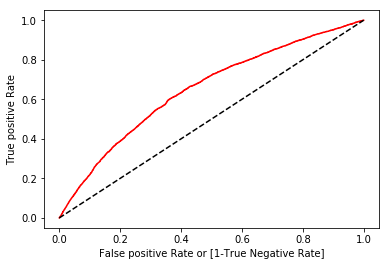

In [132]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])                              
auc=roc_auc_score(Y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',
        label='Logit model(area=%2f)'%auc)
plt.xlabel('False positive Rate or [1-True Negative Rate]')
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True positive Rate')





In [133]:
auc

0.5001264495450378